In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X, y = make_moons(n_samples=1000, noise=0.4) #generating the moons dataset

#splitting data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Now for some GridSearch Action
#Defining parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}

#Creating GridSearch object

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

#fit the obejct to the training data

grid.fit(X_train, y_train)

#print parameters

print(f"Best parameters: {grid.best_params_}")

#Evaluate
accuracy = grid.score(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test accuracy: 0.875


Accuracy: 0.805


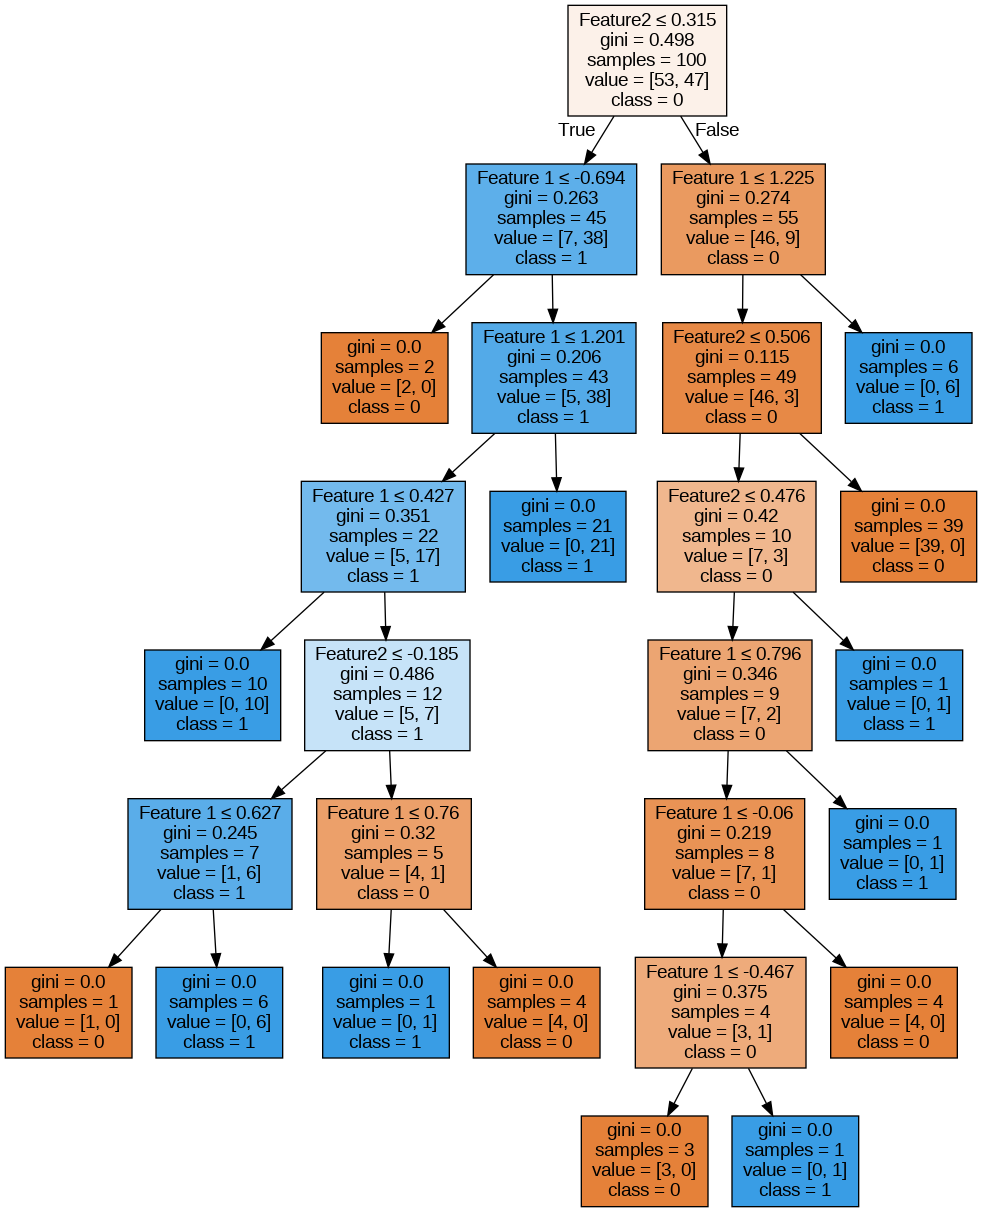

In [ ]:
#PT2 GROWING THE FOREST

from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

#bringing the data for shufflesplit
X, y = make_moons(n_samples=1000, noise=0.4)

#telling shuffle split we want 1000 instaces of 100 making the object
ss = ShuffleSplit(n_splits=1000, test_size=None, train_size=100, random_state=42)

#iterating through the splits
for train_index, _ in ss.split(X):
    X_train = X[train_index]
    y_train = y[train_index]

#creating our tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

#make predictions and evaluate
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#visialize for my sake

from sklearn.tree import export_graphviz
import graphviz

feature_names = ['Feature 1', 'Feature2']
dot_data = export_graphviz(tree, out_file=None, feature_names=feature_names, class_names=sorted(np.unique(y).astype(str)), filled=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("moons_tree", format="png", cleanup=True)
Image(filename="moons_tree.png")

In [ ]:
import numpy as np
from scipy.stats import mode

#the magic using the mode function
n_trees = 1000
predictions = []

for _ in range(n_trees):

    X, y = make_moons(n_samples=1000, noise=0.4)

    #splitting data into training and testing
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    predictions.append(tree.predict(X_test))

predictions = np.array(predictions)
majority_vote_predictions = mode(predictions, axis=0)[0].ravel()

accuracy = accuracy_score(y_test, majority_vote_predictions)
print(f"Majority Vote Accuracy: {accuracy}")


Majority Vote Accuracy: 0.91


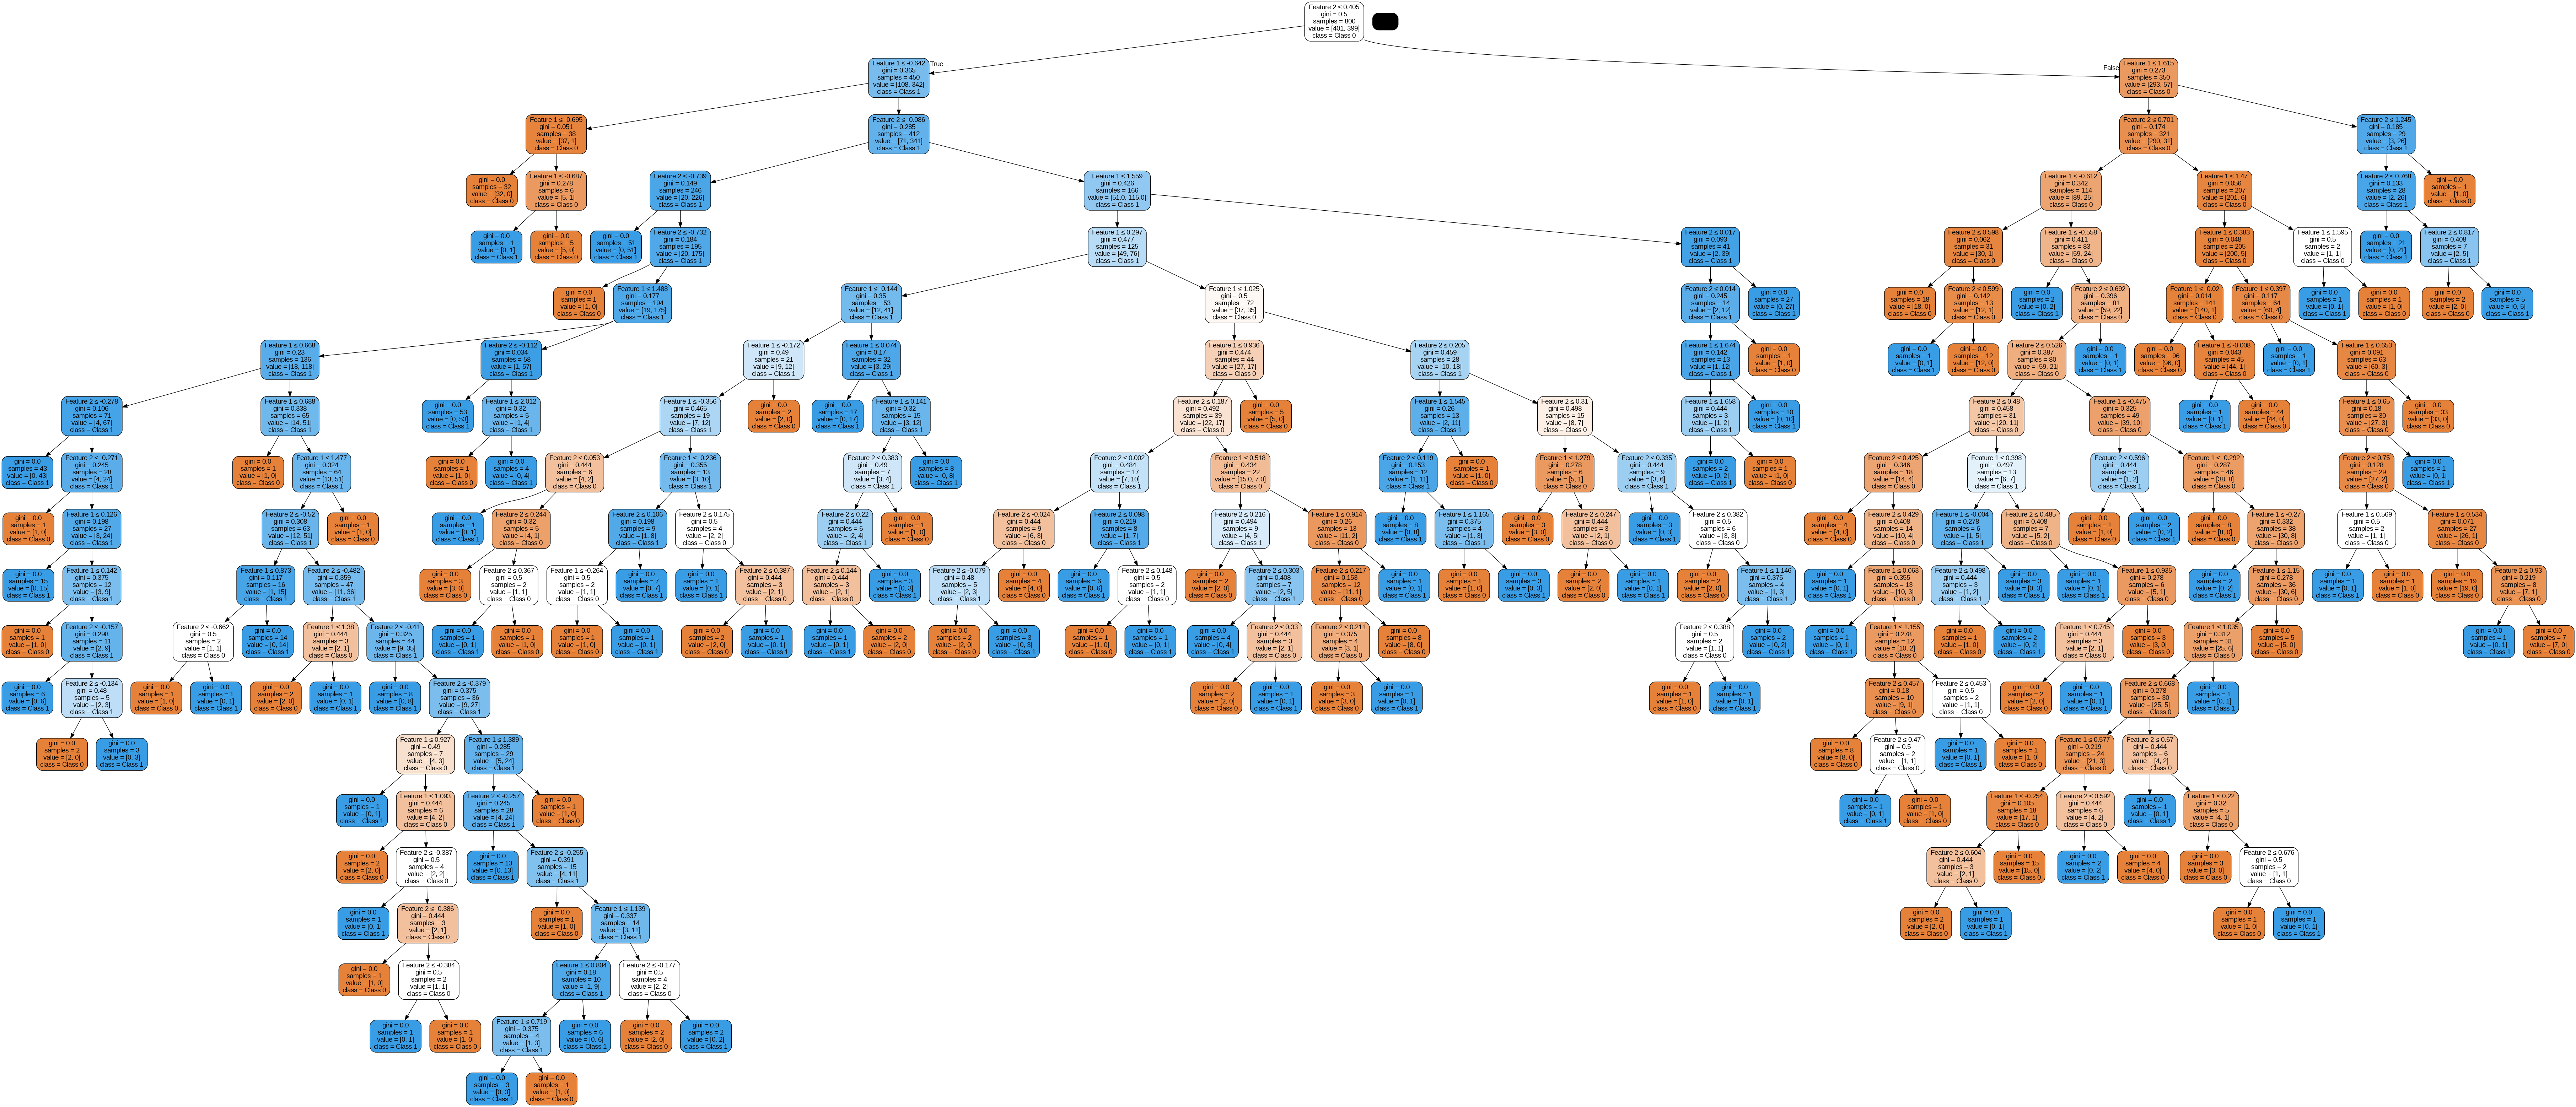

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

#visualizing new tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('moonsranforest.png')
Image(graph.create_png())